In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
# Load the data
dataFrame = pd.read_csv('LoL_champions.csv')

In [3]:
# Show the first few rows of the DataFrame
dataFrame.head()

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


In [4]:
# Get summary statistics for numerical columns
dataFrame.describe()

,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,Base armor,Armor per lvl,Base magic resistance,Magic resistance per lvl,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,617.856287,104.059880,313.586826,36.712575,336.155689,29.886228,4.64521,30.760479,1.684731,328.023952,6.297904,0.658084,8.124551,0.574251,58.856287,3.193962,2.536677,0.652275,0.636533
std,39.468040,8.687133,122.071293,19.780376,7.060817,6.400696,0.51391,1.701203,0.379112,193.318326,1.904721,0.151530,7.964615,0.296610,5.665660,0.656317,0.890675,0.035445,0.066561
min,410.000000,69.000000,0.000000,0.000000,325.000000,18.000000,0.00000,22.000000,1.100000,125.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.475000,0.000000
25%,595.500000,99.000000,280.000000,25.500000,330.000000,25.000000,4.42500,30.000000,1.300000,125.000000,5.500000,0.550000,6.500000,0.400000,55.000000,3.000000,2.000000,0.625000,0.625000
50%,625.000000,104.000000,330.000000,40.000000,335.000000,30.000000,4.70000,30.000000,1.550000,175.000000,6.500000,0.600000,7.500000,0.700000,59.000000,3.100000,2.500000,0.651000,0.638000
75%,645.000000,109.000000,392.500000,50.000000,340.000000,34.000000,4.95000,32.000000,2.050000,525.000000,8.000000,0.750000,8.000000,0.800000,63.000000,3.500000,3.200000,0.667000,0.658000
max,696.000000,129.000000,530.000000,87.000000,355.000000,47.000000,5.50000,39.000000,2.550000,650.000000,10.000000,1.250000,50.000000,1.000000,69.000000,5.000000,6.000000,0.850000,0.850000


In [5]:
# Count missing values in each column
dataFrame.isnull().sum()

Name                         0
Tags                         0
Role                         0
Range type                   0
Resourse type                7
Base HP                      0
HP per lvl                   0
Base mana                    0
Mana per lvl                 0
Movement speed               0
Base armor                   0
Armor per lvl                0
Base magic resistance        0
Magic resistance per lvl     0
Attack range                 0
HP regeneration              0
HP regeneration per lvl      0
Mana regeneration            0
Mana regeneration per lvl    0
Attack damage                0
Attack damage per lvl        0
Attack speed per lvl         0
Attack speed                 0
AS ratio                     0
dtype: int64

In [6]:
# Fill missing 'Resourse type' with the most frequent value
dataFrame['Resourse type'] = dataFrame['Resourse type'].fillna(dataFrame['Resourse type'].mode()[0])

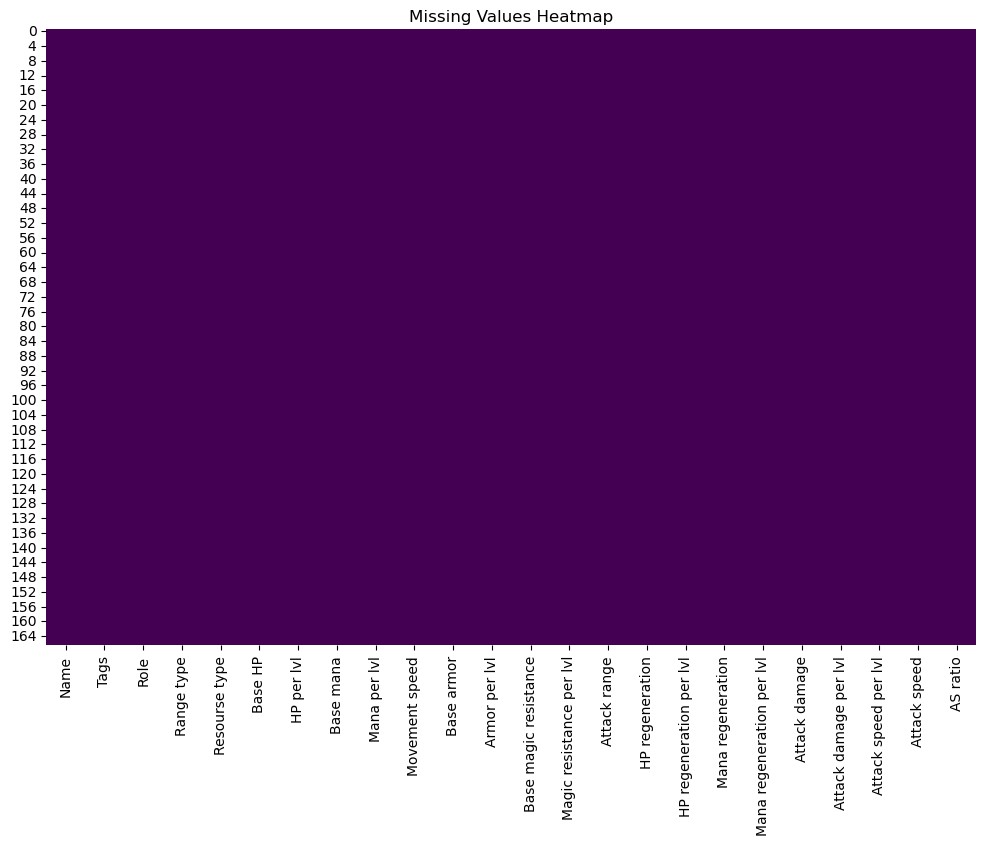

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(dataFrame.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Encode categorical variables using OneHotEncoder
categorical_columns = ['Resourse type', 'Role']
numerical_columns = dataFrame.select_dtypes(include=['number']).columns.tolist()

In [9]:
# Ensure 'Range type' is not in numerical_columns
numerical_columns = [col for col in numerical_columns if col != 'Range type']

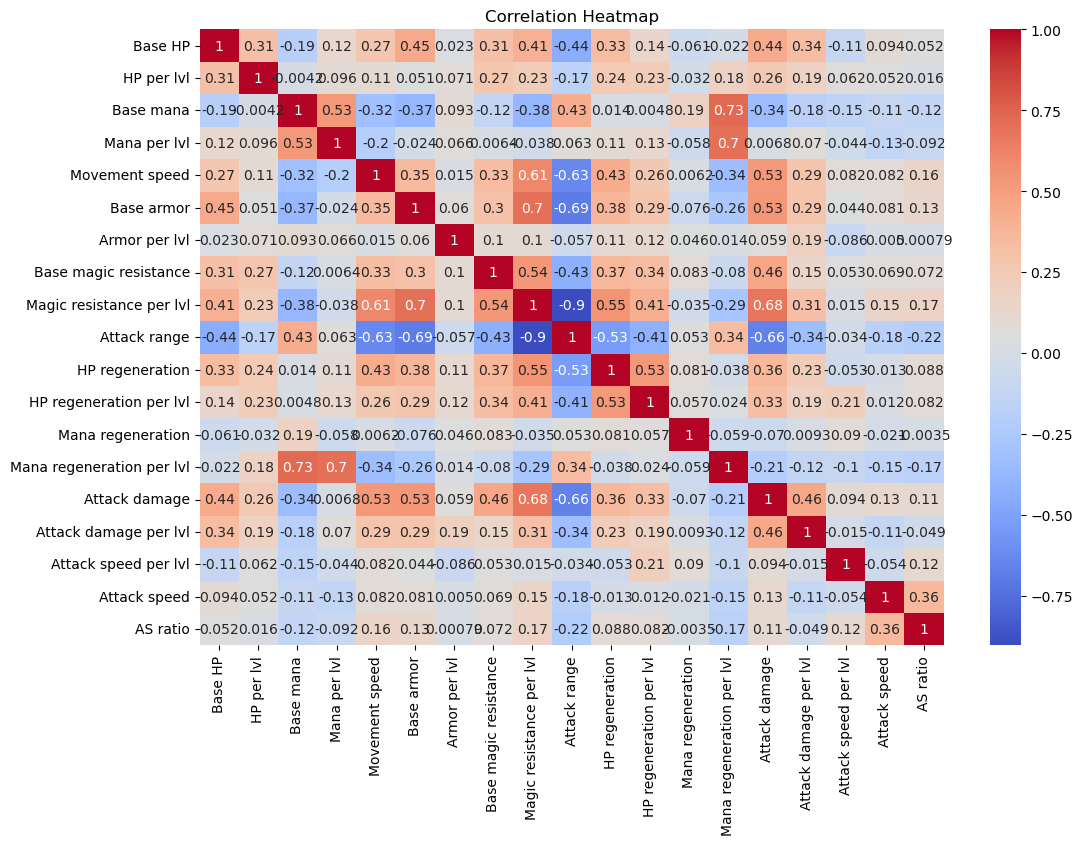

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataFrame[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

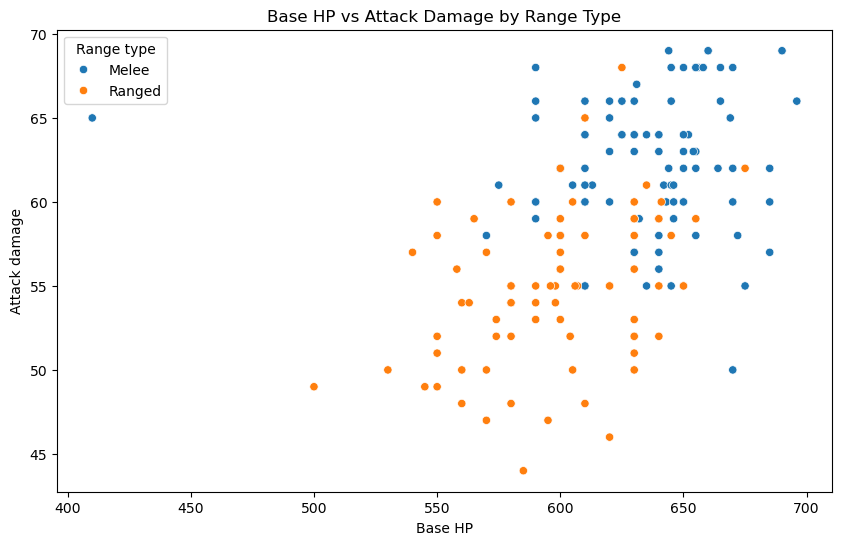

In [11]:
# Scatter plot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base HP', y='Attack damage', data=dataFrame, hue='Range type')
plt.title('Base HP vs Attack Damage by Range Type')
plt.show()

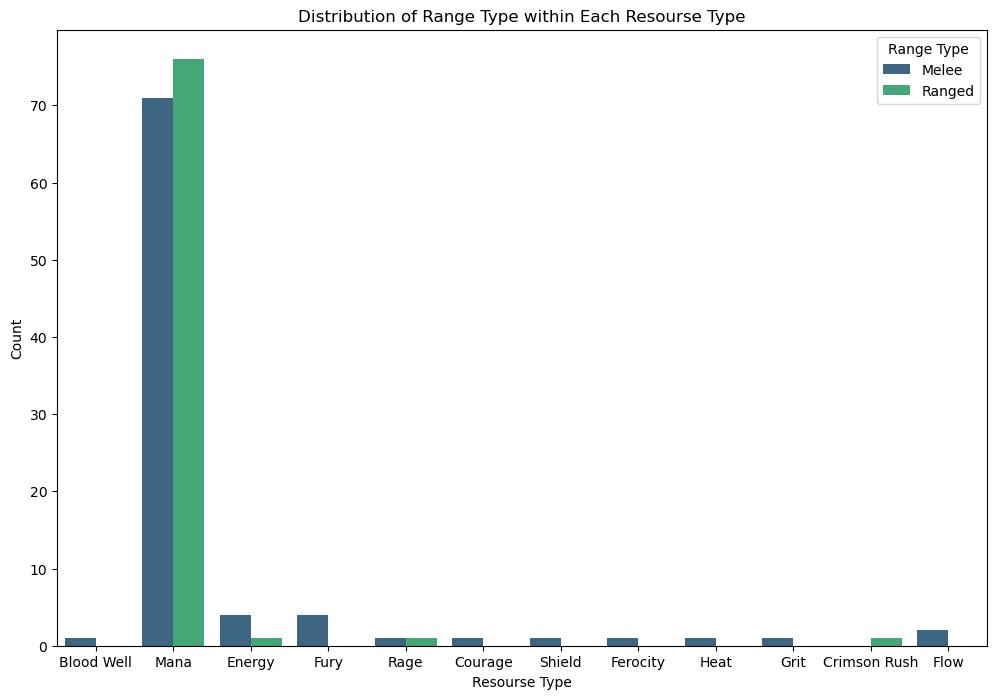

In [12]:
# Countplot to visualize the distribution of 'Range type' within each 'Resourse type'
plt.figure(figsize=(12, 8))
sns.countplot(x='Resourse type', hue='Range type', data=dataFrame, palette='viridis')
plt.title('Distribution of Range Type within Each Resourse Type')
plt.xlabel('Resourse Type')
plt.ylabel('Count')
plt.legend(title='Range Type')
plt.show()

In [13]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [14]:
# Select features and target
X = dataFrame.drop(columns=['Name', 'Tags', 'Range type'])
y = dataFrame['Range type']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [17]:
# Train the RandomForest model
pipeline_rf.fit(X_train, y_train)

# Make predictions with RandomForest
y_pred_rf = pipeline_rf.predict(X_test)

In [18]:
# Evaluate the RandomForest model
classification_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
print("Random Forest Classification Report:\n", classification_report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

       Melee       1.00      1.00      1.00        14
      Ranged       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



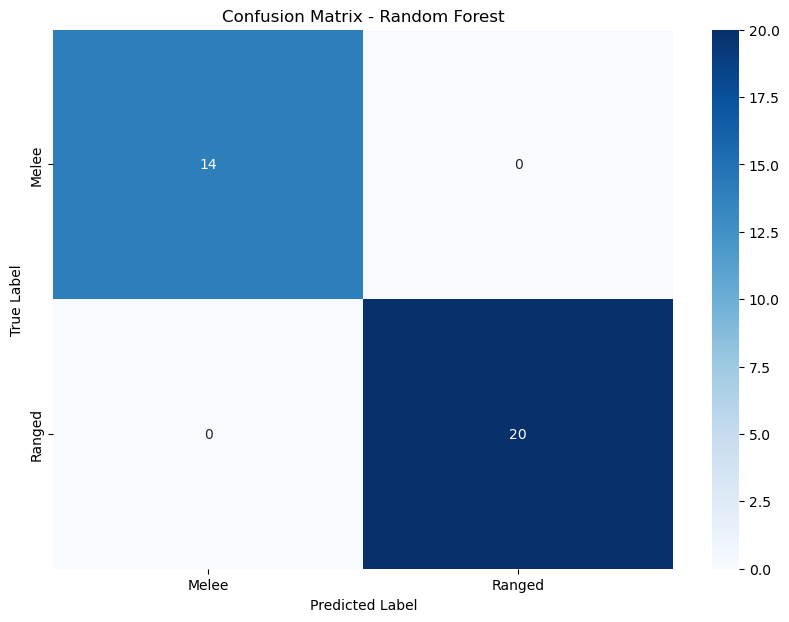

In [19]:
# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
# DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [21]:
# Train the DecisionTree model
pipeline_dt.fit(X_train, y_train)

# Make predictions with DecisionTree
y_pred_dt = pipeline_dt.predict(X_test)

In [22]:
# Evaluate the DecisionTree model
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)
print("Decision Tree Classification Report:\n", classification_report_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

       Melee       1.00      1.00      1.00        14
      Ranged       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



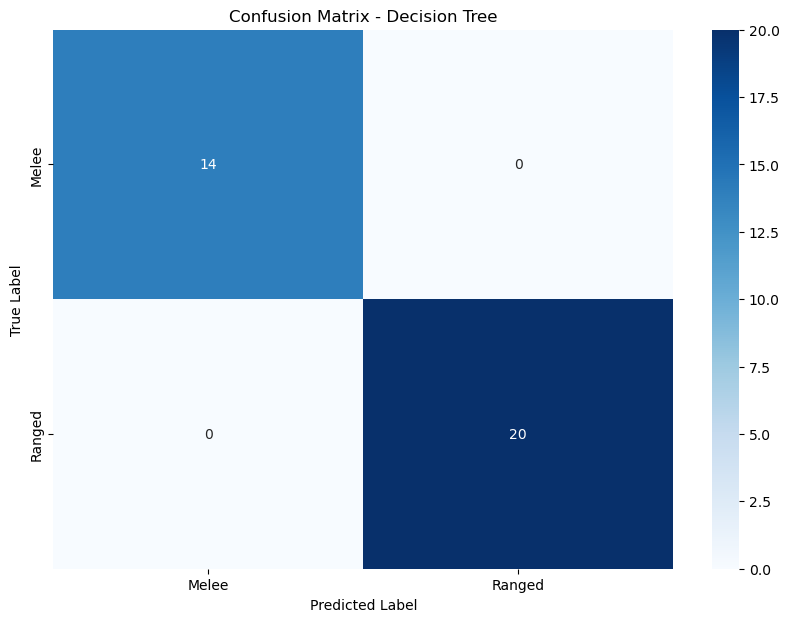

In [23]:
# Confusion matrix for DecisionTree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()